In [1]:
import glob
import matplotlib.pyplot as plt

In [2]:
books = glob.glob("OriginalData/*.txt")
bookshelf=[]
for eachBook in books:
    name=eachBook[eachBook.index("B"):eachBook.index(".")]
    bookshelf.append(name)

### Cleaning Data and removing blank lines 

In [4]:
print(bookshelf)

[]


In [6]:
amountComp=[]
for i in range(7):
    with open(f"OriginalData/{bookshelf[i]}.txt","r",encoding="utf8") as file:
        f = file.readlines()
        file.close()

    out=[]
    # remove the lines with just \n
    for eachLine in f:
        if not eachLine == "\n":
            out.append(eachLine)

    print(len(f))
    print(len(out))
    print(f"Reduced by: {((1-len(out)/len(f))*100):.1f}%")
    amountComp.append((1-len(out)/len(f))*100)
    
    #write out to a clean data to a new folder in utf8 formatting
    cleanFile = open(f"CleanData/Clean-{bookshelf[i]}.txt","w+",encoding="utf8")
    for eachLine in out:
        cleanFile.write(eachLine)
    cleanFile.close()

IndexError: list index out of range

In [7]:
for i in range(7):
    print(f"{bookshelf[i]} reduced by {amountComp[i]:.1f}")

IndexError: list index out of range

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (0,).

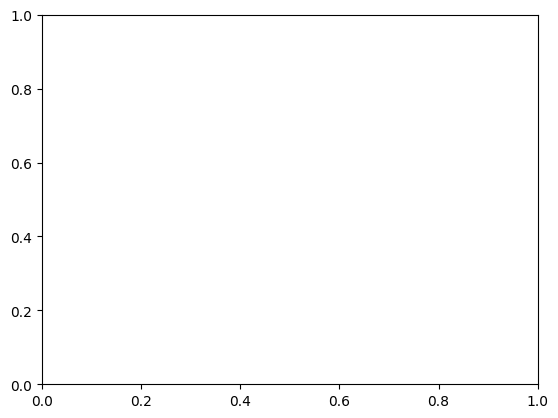

In [8]:
plt.bar(range(1,8),amountComp)
plt.title("Amount of Lines Reduced")
plt.xlabel("Book #")
plt.ylabel("% reduced")
plt.ylim(31,34)
plt.show()

In [12]:
wordsToFind={  #Python Dictionary or JSON
    #"key":value
    "Harry":0,
    "Ron":0,
    "Ronald":0,
    "Hermione":0,
    "Albus":0,
    "Hagrid":0,
    "wizard":0,
    "witch":0,
    "Wizard":0,
    "Witch":0,
    "Snake":0,
    "snake":0,
    "Voldemort":0,
    "Tom Marvolo Riddle":0,
    "You-Know-Who":0,
    "The Dark Lord":0,
    "He-Who-Must-Not-Be-Named":0,
}

In [13]:
for i in range(7):
    file = open(f"CleanData/Clean-{bookshelf[i]}.txt","r",encoding="utf8")
    for eachLine in file:
        for eachName in wordsToFind:
            if not "Rowling" in eachLine:   #skip page title at bottom
                wordsInALine = eachLine.split(" ")
                for eachWord in wordsInALine:
                    if eachName in eachWord:
                        wordsToFind[eachName]+=1
    file.close()
    for name, instances in wordsToFind.items():
        print(f"Total instances of {name}:{instances}")

IndexError: list index out of range